<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week7/MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [18]:
# 정규화 (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0


print("x_train shape:", x_train.shape) # (60000, 28, 28)
print("x_test shape:", x_test.shape)   # (10000, 28, 28)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [19]:
# DNN 모델 구성
model_dnn = models.Sequential([
    # (28, 28) 이 (784, )로 바뀌게 됨.
    layers.Flatten(input_shape=(28, 28)),
    #층1
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    #층2
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    #출력층
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# 컴파일
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
# 학습
history_dnn = model_dnn.fit(x_train, y_train, epochs=10,
                            validation_split=0.1, batch_size=128, verbose=2) # 반복수를 10번으로 지정하여 학습시키기.

Epoch 1/10
422/422 - 6s - 15ms/step - accuracy: 0.7785 - loss: 0.6312 - val_accuracy: 0.8433 - val_loss: 0.4219
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.8426 - loss: 0.4396 - val_accuracy: 0.8633 - val_loss: 0.3651
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.8582 - loss: 0.3948 - val_accuracy: 0.8697 - val_loss: 0.3518
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.8659 - loss: 0.3730 - val_accuracy: 0.8733 - val_loss: 0.3393
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.8709 - loss: 0.3568 - val_accuracy: 0.8788 - val_loss: 0.3323
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.8755 - loss: 0.3434 - val_accuracy: 0.8813 - val_loss: 0.3248
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.8782 - loss: 0.3299 - val_accuracy: 0.8780 - val_loss: 0.3308
Epoch 8/10
422/422 - 1s - 2ms/step - accuracy: 0.8823 - loss: 0.3193 - val_accuracy: 0.8817 - val_loss: 0.3275
Epoch 9/10
422/422 - 1s - 2ms/step - accuracy: 0.8848 - loss: 0.3140 - val_accuracy: 0.8778 - val_loss: 0.3228


In [22]:
# 평가
test_loss, test_acc = model_dnn.evaluate(x_test, y_test, verbose=2)
print(f"DNN Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.8794 - loss: 0.3360
DNN Test Accuracy: 0.8794


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


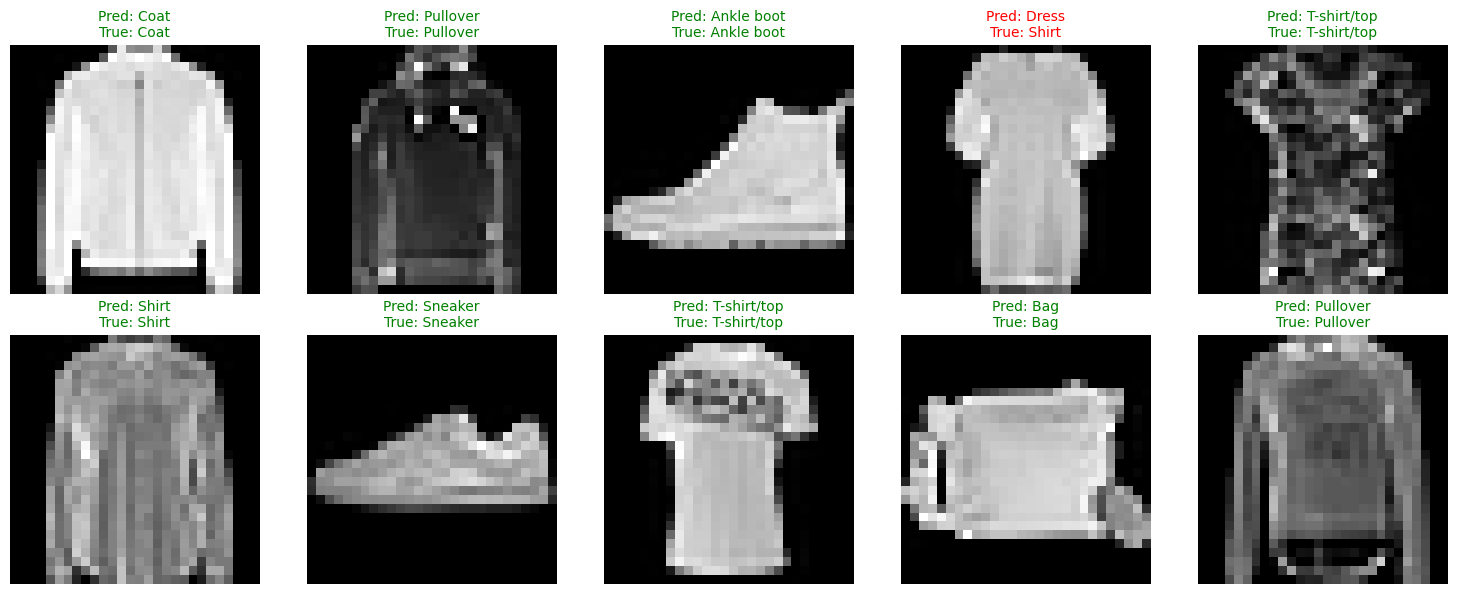

In [23]:
# ==========================================
# 7️⃣ 예측 예시 (랜덤 10개 시각화)
# ==========================================

# 클래스 이름
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 무작위 10개 샘플 선택
num_samples = 10
idx = np.random.choice(len(x_test), num_samples, replace=False)

# 예측 수행
predictions = model_dnn.predict(x_test[idx]) # 이미지의 클래스 별 확률 출력
pred_labels = np.argmax(predictions, axis=1) # 가장 높은 클래스의 확률 선택
true_labels = y_test[idx]

# 시각화
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx[i]], cmap='gray')
    color = "green" if pred_labels[i] == true_labels[i] else "red"
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[true_labels[i]]}",
              color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
